In [1]:
#Medical Insurance project  using RandamForestTreeRegression

(200, 7)
              age        bmi    children       charges
count  200.000000  200.00000  200.000000    200.000000
mean    42.410000   26.92250    2.730000  24681.839750
std     13.572137    7.13523    1.755709  14044.082352
min     18.000000   15.10000    0.000000   2194.720000
25%     30.000000   20.47500    1.000000  12172.215000
50%     42.500000   26.80000    3.000000  24083.050000
75%     53.000000   33.30000    4.000000  36567.335000
max     65.000000   40.00000    5.000000  49952.230000
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
     age     sex   bmi  children smoker     region   charges
195   41  female  27.7         0     no  northwest  46526.13
196   60  female  19.4         5    yes  northeast   7239.89
197   37    male  23.0         0    yes  southeast  26861.69
198   47  female  25.1         1    yes  northwest  37458.97
199   56    male  39.1         1    yes  southeast  28416.76
prediction medical 

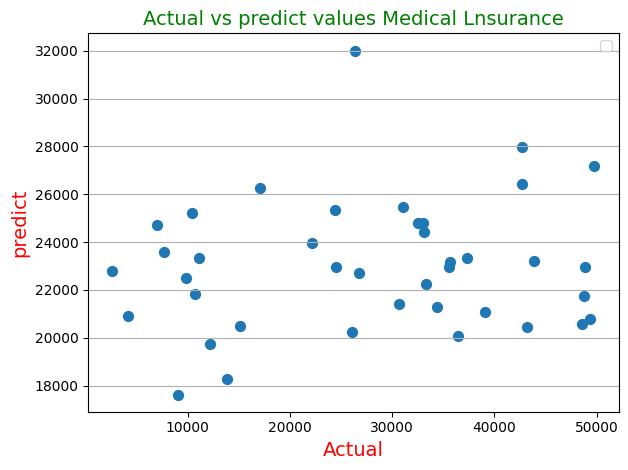

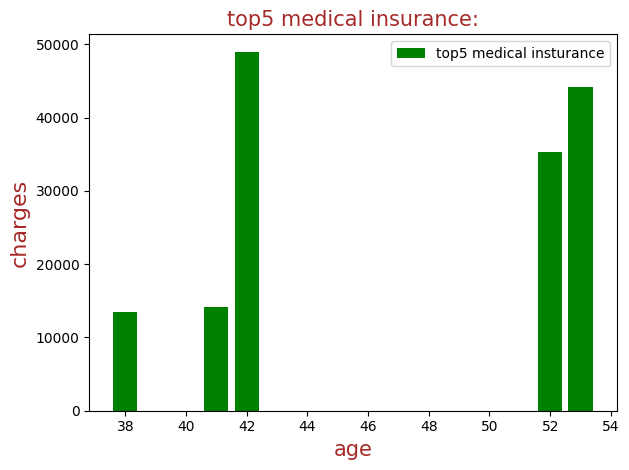

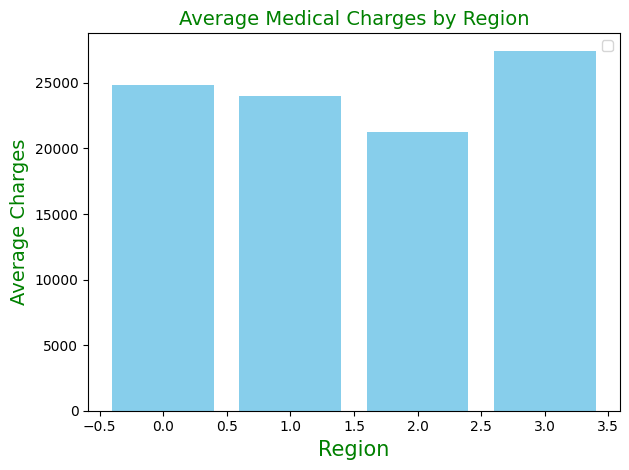

age: 0.32
sex: 0.04
bmi: 0.37
children: 0.09
smoker: 0.06
region: 0.12


['medical_insurance.pkl']

In [71]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import joblib

#loading data with pandas ---
#step 1:
df = pd.read_csv(r"C:\Users\indur\Downloads\medical_insurance_200.csv")
df

#EDA == Exploratory Data Analysis
#step2:

print(df.shape)
print(df.describe())
print(df.isnull().sum())
top5  = df.head()
top5
print(df.tail())

#step3:
#string to numeiric

label = LabelEncoder()
df['sex'] =label.fit_transform(df['sex'])
df['smoker'] = label.fit_transform(df['smoker'])
df['region'] = label.fit_transform(df['region'])

#step4:
# featute is x and target is y columns:

x = df[['age','sex','bmi','children','smoker','region']]
y =  df['charges']

#step5:
#scaling

standard = StandardScaler()
x_feture = standard.fit_transform(x)

#step6:
#train_test_split:

x_train,x_test,y_train,y_test = train_test_split(x_feture,y,test_size = 0.2,random_state = 42)

#step6:
#model:

model = RandomForestRegressor(n_estimators = 100,max_depth = 3)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_score = model.score(x_train,y_train)
print('prediction medical insurance with score:',y_score)

#in arry

for i,pred  in enumerate(y_predict):
    print(f'{i}:{pred}')

#step 7:
#metics------------------

print('r2_score:',r2_score(y_test,y_predict))
print('mean_square_error:',mean_squared_error(y_test,y_predict))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predict))

#actucal vs y_predict:

result = pd.DataFrame({
    'actual':y_test,
    'predict':y_predict 
})
result


#step8:
#visualization
#actual vs predict:

plt.scatter(result['actual'],result['predict'],cmap='set1',s =50)
plt.title('Actual vs predict values Medical Lnsurance' , color = 'green',fontsize = '14')
plt.xlabel('Actual',color = 'red',fontsize = '14')
plt.ylabel('predict',color = 'red',fontsize='14')
plt.tight_layout()
plt.legend()
plt.grid(axis = 'y')
plt.show()


#top 5 medical_linsurance:
plt.bar(top5['age'],top5['charges'],color = 'green',label = 'top5 medical insturance')
plt.title('top5 medical insurance:',color = 'brown',fontsize = '15')
plt.xlabel('age',color = 'brown',fontsize = '15')
plt.ylabel('charges',color = 'brown',fontsize = '16')
plt.tight_layout()
plt.legend()
plt.show()


#average chareges:

mean_value = df.groupby('region')['charges'].mean()
mean_value

plt.bar(mean_value.index, mean_value.values, color='skyblue')
plt.xlabel('Region',color = 'green',fontsize ='15')
plt.ylabel('Average Charges',color = 'green',fontsize ='14')
plt.title('Average Medical Charges by Region',color = 'green',fontsize = '14')
plt.tight_layout()
plt.legend()
plt.show()


importances = model.feature_importances_
for feature, importance in zip(x.columns, importances):
    print(f"{feature}: {importance:.2f}")


joblib.dump(model, 'medical_insurance.pkl')
